## Here I have build a model for movie recommendation system.
#### This model will recommend you movies on the basis of your choice. I have used KNN Algorithm for building this model.😊

In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
movies= pd.read_csv('movies.csv')
print(movies.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [4]:
ratings= pd.read_csv('ratings.csv')
print(ratings.head())

   userId  movieId  rating   timestamp
0       1       16     4.0  1217897793
1       1       24     1.5  1217895807
2       1       32     4.0  1217896246
3       1       47     4.0  1217896556
4       1       50     4.0  1217896523


In [5]:
print(movies.info())
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB
None


In [6]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
print(final_dataset.head())

userId   1    2    3    4    5    6    7    8    9    10   ...  659  660  661  \
movieId                                                    ...                  
1        NaN  5.0  NaN  NaN  4.0  NaN  NaN  5.0  NaN  NaN  ...  NaN  NaN  4.0   
2        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
3        NaN  2.0  NaN  NaN  NaN  NaN  NaN  4.0  3.0  NaN  ...  NaN  NaN  3.0   
4        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
5        NaN  3.0  3.0  NaN  NaN  NaN  NaN  3.0  NaN  NaN  ...  NaN  NaN  3.0   

userId   662  663  664  665  666  667  668  
movieId                                     
1        5.0  3.0  NaN  NaN  NaN  NaN  3.0  
2        5.0  NaN  NaN  NaN  NaN  NaN  3.0  
3        NaN  NaN  NaN  NaN  NaN  NaN  2.0  
4        NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5        NaN  NaN  NaN  NaN  NaN  NaN  2.5  

[5 rows x 668 columns]


In [10]:
final_dataset.fillna(0,inplace=True)
print(final_dataset.head())

userId   1    2    3    4    5    6    7    8    9    10   ...  659  660  661  \
movieId                                                    ...                  
1        0.0  5.0  0.0  0.0  4.0  0.0  0.0  5.0  0.0  0.0  ...  0.0  0.0  4.0   
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3        0.0  2.0  0.0  0.0  0.0  0.0  0.0  4.0  3.0  0.0  ...  0.0  0.0  3.0   
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5        0.0  3.0  3.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  ...  0.0  0.0  3.0   

userId   662  663  664  665  666  667  668  
movieId                                     
1        5.0  3.0  0.0  0.0  0.0  0.0  3.0  
2        5.0  0.0  0.0  0.0  0.0  0.0  3.0  
3        0.0  0.0  0.0  0.0  0.0  0.0  2.0  
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5        0.0  0.0  0.0  0.0  0.0  0.0  2.5  

[5 rows x 668 columns]


In [17]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')

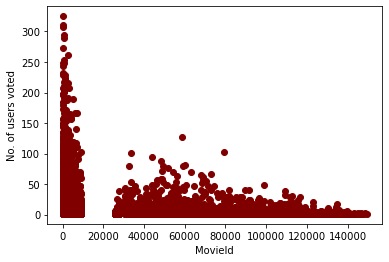

In [21]:
plt.scatter(no_user_voted.index,no_user_voted,color='maroon')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

### Building KNN model for recommendation system

In [22]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [23]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [24]:
def get_recommendation(movie_name):
    no_movies_to_recommend = 5  #5 movies will be recommended.You can change it according to your convinience 
    movie_list =movies[movies['title'].str.contains(movie_name)]
    if len(movie_name):
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=no_movies_to_recommend+1)    
        recommend_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in recommend_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,no_movies_to_recommend+1))
        return df
    else:
        return "Oops☹!!No movies found. Please check your input"

### Hello Friends😊!! Now you can get recommendation of movies on your choice.

In [27]:
get_recommendation('Avengers')

,Title,Distance
1,Exorcist II: The Heretic (1977),0.399878
2,Godzilla 1985: The Legend Is Reborn (Gojira) (...,0.370081
3,Showdown in Little Tokyo (1991),0.324010
4,Creepshow 2 (1987),0.313505
5,Burglar (1987),0.238567


In [28]:
get_recommendation('Toy Story')

,Title,Distance
1,Back to the Future (1985),0.422687
2,Independence Day (a.k.a. ID4) (1996),0.421632
3,Raiders of the Lost Ark (Indiana Jones and the...,0.413943
4,Star Wars: Episode IV - A New Hope (1977),0.371223
5,Star Wars: Episode VI - Return of the Jedi (1983),0.370163


In [32]:
get_recommendation('Iron Man')

,Title,Distance
1,"Bourne Ultimatum, The (2007)",0.384028
2,"Avengers, The (2012)",0.383603
3,Star Trek (2009),0.347590
4,Casino Royale (2006),0.336973
5,"Dark Knight, The (2008)",0.318392
